<h3>Import packages</h3>

In [19]:
import requests #pull data from the cryptowat.ch
import pandas as pd #to process pulled data

<h3>Function to get data and create data frame</h3>

In [6]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

<h3>Plotting Basics</h3>

In [27]:
last_week = (pd.Timestamp.now()-pd.offsets.Day(7)) 
print(pd.Timestamp.now())
print(last_week)

2021-05-04 12:30:47.427176
2021-04-27 12:30:47.427176


In [28]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [29]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [22]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,164.000000,164.000000,164.000000,164.000000,164.000000,1.640000e+02
mean,55972.219695,56241.874268,55687.433659,55977.328720,153.792617,8.563793e+06
std,1633.714663,1624.431725,1631.706589,1629.455647,105.724611,5.807035e+06
min,52750.020000,53051.220000,52379.900000,52779.040000,18.914751,1.090801e+06
25%,54560.887500,54813.960000,54300.597500,54557.535000,84.582790,4.810809e+06
50%,56020.905000,56569.395000,55649.950000,56008.570000,122.283891,6.729399e+06
75%,57510.292500,57751.397500,57310.687500,57515.802500,182.834860,1.012474e+07
max,58841.690000,59000.000000,58650.400000,58819.700000,674.211837,3.726937e+07


In [23]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-04-27 09:00:00,54614.85,55041.00,54417.51,54506.26,179.827716,9.839128e+06
2021-04-27 10:00:00,54477.77,54762.74,54400.00,54558.80,132.760421,7.249665e+06
2021-04-27 11:00:00,54563.27,54865.75,54500.10,54778.27,182.751560,9.991722e+06
2021-04-27 12:00:00,54778.27,55318.08,54736.39,55215.80,189.640004,1.042559e+07
2021-04-27 13:00:00,55215.80,55354.59,54814.49,54900.00,147.823512,8.140504e+06


<AxesSubplot:xlabel='CloseTime'>

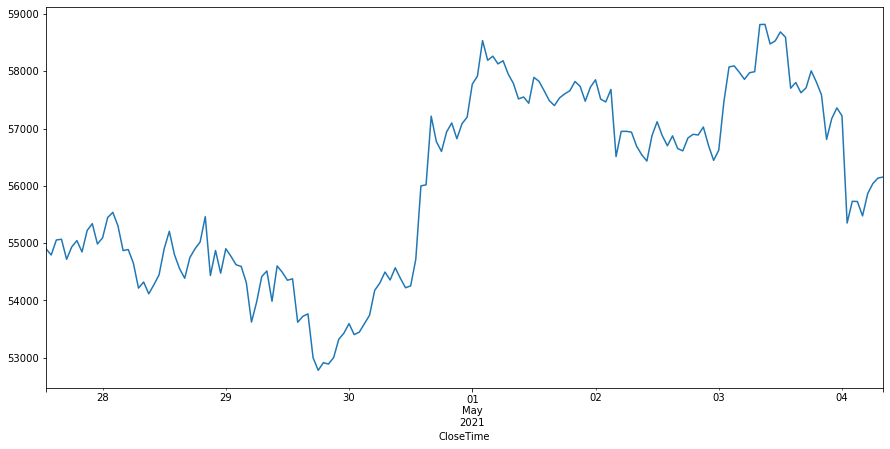

In [33]:
btc['ClosePrice'].plot(figsize=(15,7))

In [35]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,164.000000,164.000000,164.000000,164.000000,164.000000,1.640000e+02
mean,2861.859817,2882.409817,2842.476585,2866.454573,2530.526037,7.357466e+06
std,200.698225,206.682904,196.826552,203.044103,2226.541020,6.984132e+06
min,2558.330000,2571.720000,2537.100000,2558.250000,39.660000,1.331497e+05
25%,2727.827500,2740.767500,2708.835000,2726.752500,1290.223748,3.708771e+06
50%,2783.830000,2795.285000,2766.460000,2786.315000,1933.602964,5.426492e+06
75%,2941.015000,2955.257500,2927.342500,2944.232500,3011.308388,8.908838e+06
max,3434.320000,3457.640000,3372.030000,3430.160000,19126.403066,6.426360e+07


In [36]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-04-27 13:00:00,2578.38,2587.48,2553.79,2558.25,2500.739932,6.428877e+06
2021-04-27 14:00:00,2558.33,2571.72,2537.10,2558.56,3420.935203,8.746006e+06
2021-04-27 15:00:00,2558.88,2641.49,2541.22,2638.64,10255.183218,2.665111e+07
2021-04-27 16:00:00,2639.16,2674.86,2622.70,2667.30,6826.059461,1.805429e+07
2021-04-27 17:00:00,2668.67,2683.65,2627.06,2634.78,3719.018995,9.871238e+06


Text(0, 0.5, 'price')

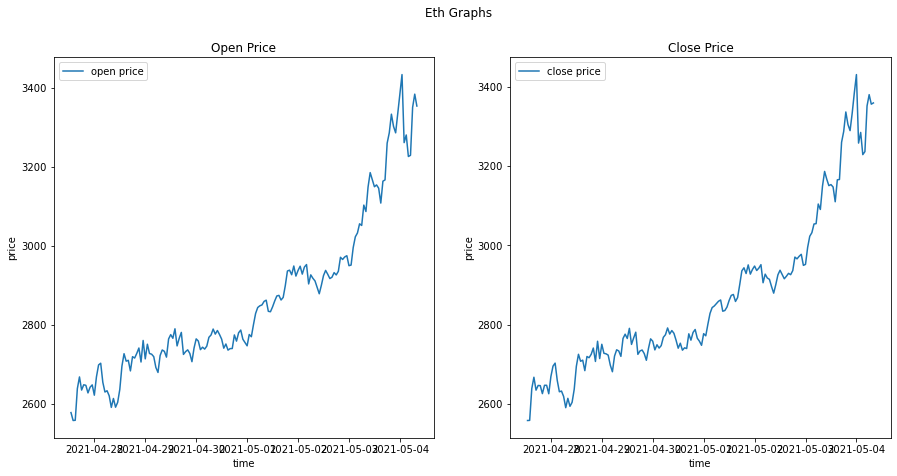

In [93]:
import matplotlib.pyplot as plt
import numpy as np

fig,(ax1,ax2) =  plt.subplots(1,2,figsize=(15,7))
fig.suptitle('Eth Graphs')

ax1.plot(eth['OpenPrice'])
ax1.set_title('Open Price')
ax1.legend(['open price'])
ax1.set_xlabel('time')
ax1.set_ylabel('price')


ax2.plot(eth['ClosePrice'])
ax2.set_title('Close Price')
ax2.legend(['close price'])
ax2.set_xlabel('time')
ax2.set_ylabel('price')



<h3>Write to excel sheet</h3>

In [96]:
writer = pd.ExcelWriter('Cryptos.xlsx')

In [98]:
btc.to_excel(writer,sheet_name='Bitcoin')

In [100]:
eth.to_excel(writer,sheet_name='Ether')

In [101]:
writer.save()